In [7]:
# Task 1. Load the dataset in the file named .csv
# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('C:/Users/kseht/Downloads/winequality-white.csv') # default is header=infer, change if column names are not in first row
print('done \n')


Loading data from file ...
done 



In [8]:
#produce at least one table and one graph that summarize the dataset statistics
# Let's look at a numerical summary table

print('Summary of the dataset - in table')   
display(dataset.describe(include='all'))
print('\n')

Summary of the dataset - in table


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Summary of dataset - Univariate graphs

Histograms:


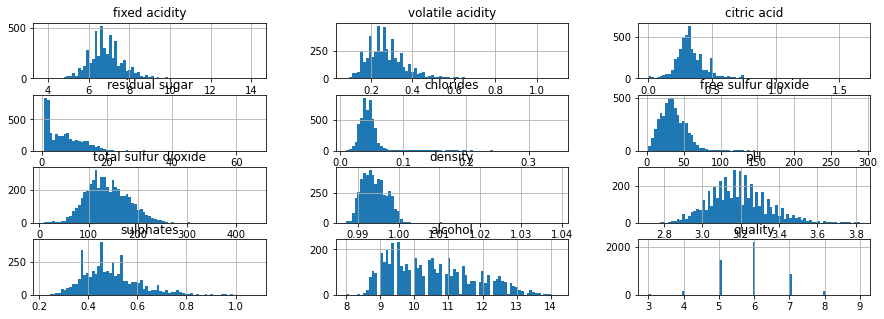

In [9]:
%matplotlib inline
import matplotlib.pyplot as pl  # https://matplotlib.org/

print('Summary of dataset - Univariate graphs')
print()

print('Histograms:')
dataset.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()


In [10]:
# 2. predicting the FlowPattern value based on the values of the variables named Vsl, Vsg, and Ang.
print('Reading list of problem variables X and Y...')
X_name = [ 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol'] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features     
y_name = 'quality'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [11]:
# Split data into training and testing datasets
from sklearn import model_selection

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


In [12]:
# Classification problem

from sklearn import model_selection # for model comparisons
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

print('training model...')
modelName = LogisticRegression(solver='liblinear')
modelName.fit(X_train, y_train)  # train the model on the training data
print('done with training the model')
# Let's compute its accuracy on the data we set aside.
from sklearn.metrics import accuracy_score

print('computing accuracy...')
y_predicted = modelName.predict(X_test)  # make predictions using the validation data 
print('Accuracy:', accuracy_score(y_test, y_predicted))

training model...
done with training the model
computing accuracy...
Accuracy: 0.5387755102040817


In [13]:
#Task 2

In [14]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Decision Tree
print('Tuning model...')
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[5, 6, 7], 'criterion':['gini', 'entropy'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Decision Tree:")
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

print(f'Decision tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...


C:\Users\kseht\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters found on development set for Decision Tree:
{'criterion': 'gini', 'max_depth': 5}
Decision tree has maximum depth 5.
f1_score is
0.22442923964191513


In [15]:
# Random Forest
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth':[3, 4, 5], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Random Forest:")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

y_pred = tuned_model_RF.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...


C:\Users\kseht\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Best hyperparameters found on development set for Random Forest:
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 50}
f1_score is
0.22302918502510932


In [16]:
# Task 3

In [25]:
from sklearn import svm# fit the model
#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1000) # Linear Kernel
hyperparameters = {'max_depth':[3, 4, 5], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



C:\Users\kseht\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 0.5622448979591836


In [27]:
from sklearn import svm# fit the model
#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid', C=0.01) # Linear Kernel
hyperparameters = {'max_depth':[3, 4, 5], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


C:\Users\kseht\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 0.5571428571428572


In [28]:
# Task 4

In [29]:
# Import libraries

# Pandas for data handling
import pandas # https://pandas.pydata.org/
# from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib+Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# data preprocessing / feature selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# combining
from sklearn.pipeline import make_pipeline

In [30]:
# 2. predicting the FlowPattern value based on the values of the variables named Vsl, Vsg, and Ang.
print('Reading list of problem variables X and Y...')
X_name = [ 'fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates', 'alcohol'] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features     
y_name = 'quality'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 
print('done \n')

Reading list of problem variables X and Y...
done 



In [31]:
# Split data into training and testing datasets
from sklearn import model_selection

test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # setting the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.851838,0.277323,0.335066,6.362864,0.045736,35.118938,137.960439,0.994009,3.186965,0.491335,10.517758
std,0.823636,0.099162,0.120757,5.100173,0.021668,16.884647,42.153704,0.003013,0.150280,0.115144,1.235696
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,9.000000,0.987130,2.740000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991712,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.100000,0.043000,34.000000,134.000000,0.993700,3.180000,0.480000,10.400000
75%,7.300000,0.320000,0.390000,9.800000,0.050000,45.000000,166.000000,0.996075,3.280000,0.550000,11.400000
max,10.700000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.000000


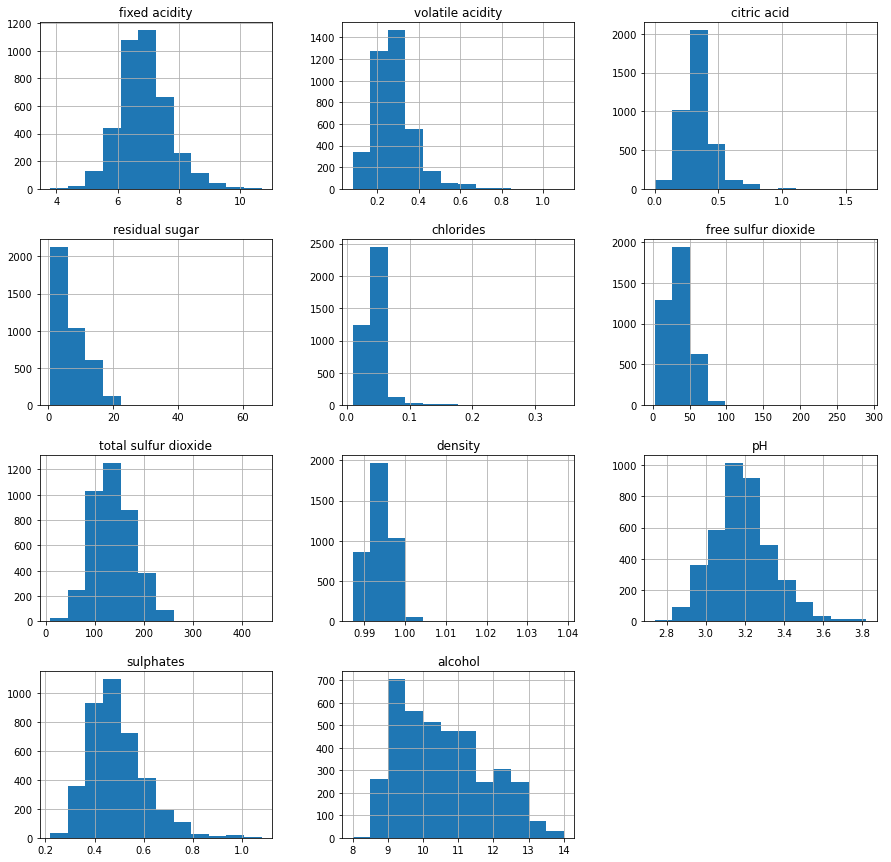

count    3918.000000
mean        5.882848
std         0.883171
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [32]:
# EDA

display(X_train.describe(include='all'))
X_train.hist(figsize=(15, 15), bins=12)  # bins ~= sqrt(N)
pl.show()

display(y_train.describe(include='all'))

In [33]:
# Chose the formative scoring method

print('Reading list of scoring methods to use during model development ...')
scoring = 'accuracy'
print('done \n')

Reading list of scoring methods to use during model development ...
done 



In [34]:
# Chose the Algorithms

seed = 42 # setting the seed allows for repeatability

print('Reading list of algorithms to train ...')
models = []
models.append(( 'raw_SVM', SVC(random_state=seed) ))
models.append(( 'scaled_SVM', make_pipeline( MinMaxScaler(), SVC(random_state=seed) )  ))
models.append(( 'raw_kNN', KNeighborsClassifier() ))
models.append(( 'scaled_kNN', make_pipeline( MinMaxScaler(), KNeighborsClassifier() )  ))
models.append(( 'raw_DT', DecisionTreeClassifier(random_state=seed) ))
models.append(( 'scaled_DT', make_pipeline( MinMaxScaler(), DecisionTreeClassifier(random_state=seed) )  ))
print('done \n')

Reading list of algorithms to train ...
done 



In [35]:
# Now it is time to train some models on the data and estimate their accuracy on unseen data.

k4folds = 5
results = []
names = []
for name, model in models:   # Select each model in turn
    print(" ++ NOW WORKING ON ALGORITHM %s ++" % name)
    print("Splitting data into %s folds" % k4folds)
    kfold = model_selection.KFold(n_splits=k4folds, random_state=seed, shuffle=True)
    print("Training model on each split ...")
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "algorithm %s %s results: mean = %f (std = %f)" % (name, scoring, cv_results.mean(), cv_results.std())
    print(msg)
    
print('done \n')

 ++ NOW WORKING ON ALGORITHM raw_SVM ++
Splitting data into 5 folds
Training model on each split ...
algorithm raw_SVM accuracy results: mean = 0.446145 (std = 0.001560)
 ++ NOW WORKING ON ALGORITHM scaled_SVM ++
Splitting data into 5 folds
Training model on each split ...
algorithm scaled_SVM accuracy results: mean = 0.542113 (std = 0.011423)
 ++ NOW WORKING ON ALGORITHM raw_kNN ++
Splitting data into 5 folds
Training model on each split ...
algorithm raw_kNN accuracy results: mean = 0.457129 (std = 0.018563)
 ++ NOW WORKING ON ALGORITHM scaled_kNN ++
Splitting data into 5 folds
Training model on each split ...
algorithm scaled_kNN accuracy results: mean = 0.530122 (std = 0.010059)
 ++ NOW WORKING ON ALGORITHM raw_DT ++
Splitting data into 5 folds
Training model on each split ...
algorithm raw_DT accuracy results: mean = 0.568147 (std = 0.013924)
 ++ NOW WORKING ON ALGORITHM scaled_DT ++
Splitting data into 5 folds
Training model on each split ...
algorithm scaled_DT accuracy results:

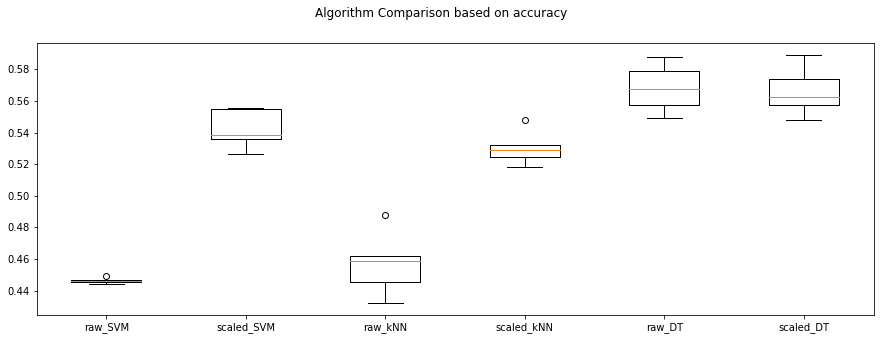

In [36]:
# Compare Algorithms
fig = pl.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison based on %s' % scoring)
ax = fig.add_subplot(111)
pl.boxplot(results)
ax.set_xticklabels(names)
pl.show()

 ++++ Detailed classification report for the selected model ++++ 
Algorithm: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())]) 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


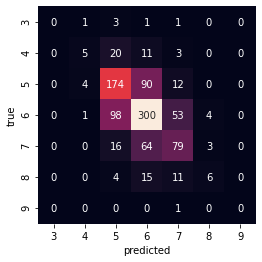


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.45      0.13      0.20        39
           5       0.55      0.62      0.58       280
           6       0.62      0.66      0.64       456
           7       0.49      0.49      0.49       162
           8       0.46      0.17      0.24        36
           9       0.00      0.00      0.00         1

    accuracy                           0.58       980
   macro avg       0.37      0.29      0.31       980
weighted avg       0.56      0.58      0.56       980

Cohen Kappa Score: 0.34880288540636717


done 



C:\Users\kseht\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
# Make predictions on test dataset
selected_model = make_pipeline( MinMaxScaler(),KNeighborsClassifier() ) 
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm: %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

In [38]:
# Task 5
# ALGORITHM raw_DT shows the best performance as the accuracy for this model is highest among all the models created.
# algorithm raw_DT accuracy results: mean = 0.568147 (std = 0.013924)